# MTH 4224 / CSE 4224 - Homework 3

## Classification Models

**Deadline**: Mar 15

**Points**: 60

### Instructions

Submit **one** Python notebook file for grading. Your file must include **text explanations** of your work, **well-commented code**, and the **outputs** from your code.

### Datasets

For problems 1-5, use the [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) of patients with and without heart disease. UCI Machine Learning Repository.

For porblems 6-10, use the [Mushroom Dataset](https://archive.ics.uci.edu/dataset/73/mushroom) containing details on many types of mushrooms. UCI Machine Learning Repository.

### Problems

#### Heart Disease Classification

1. **[5 points]** Use pairplots to analyze the feature distributions and output labels. Note any strong patterns you observe. (Use only the 14 main features listed.)

2. **[10 points]** Do a comparison of the naive Bayes' classifier, logistic regression, LDA, QDA, and K-nearest neighbors on the same train/test split.

3. **[5 points]** Train a decision tree classifier to classify which people have heart disease and test it on a test set.

4. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

5. **[5 points]** Tune either a random forest or XGBoost classifier, and justify your choice of 1 algorithm over the other.

6. **[5 points]** Compute feature importance metrics by both mean decrease in impurity and by permutation importance. Which features do these two metrics and the plotted tree from Problem 4 agree are important? Does this seem practically meaningful?

#### Mushrooms. Edible or Poisonous?

7. **[5 points]** Preprocess the data into a form for use for classification. Note most features are categorical and will need to be modified into numerical representations.

8. **[5 points]** Train a decision tree classifier to classify which mushrooms are poisonous and test it on a test set.

9. **[5 points]** Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.

10. **[10 points]** Train a XGBoost model to predict which mushrooms are poisonous and test it on a test set. Tune its hyperparameters to improve performance.

 <span style="font-size:19pt;">Name: Lamine Djibo</span>


 <span style="font-size:19pt;">1)</span>

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Column headers as a string separated by commas
headers_str = "age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"

# Split the string to get the column names
column_names = headers_str.split(',')

# Replace 'your_file_path.data' with the actual path to your .data file
file_path = 'processed.cleveland.data'

# Read the .data file into a DataFrame
df = pd.read_table(file_path,sep=",", header=None, names= column_names)

print(df.shape)

print(df)


(303, 14)
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0 

In [168]:
# Function to check if a column contains non-numeric values
def has_non_numeric(column):
    return not column.apply(lambda x: isinstance(x, (int, float))).all()

# Get column names with non-numeric values
non_numeric_columns = [col for col in df.columns if has_non_numeric(df[col])]

print("Columns with non-numeric values:", non_numeric_columns)


# Function to check if a value is "?"
def is_question_mark(value):
    return value == "?"

# Iterate through 'ca' and 'thal' columns
for column in non_numeric_columns:
    print(f"Instances of '?' values in column '{column}':")
    question_mark_rows = df[df[column].apply(is_question_mark)]
    for index, row in question_mark_rows.iterrows():
        print(f"Row {index}: {row[column]}")
    # Drop rows with '?' value
    df = df.drop(question_mark_rows.index)

print("\nDataFrame after removing rows with '?' values:")
print(df.shape)


# Function to check if a value is non-numeric
# def is_non_numeric(value):
#     try:
#         float(value)
#         return False
#     except ValueError:
#         return True


# # Iterate through non-numeric columns
# for column in non_numeric_columns:
#     print(f"Non-numeric values in column '{column}':")
#     for index, value in df[df[column].apply(is_non_numeric)].iterrows():
#         print(f"Row {index}: {value[column]}")
#     # Remove rows with non-numeric values
#     df = df.drop(df[df[column].apply(is_non_numeric)].index)

# print("\nDataFrame after removing rows with non-numeric values:")
# print(df)


# Convert all values to type int
try:
    df = df.astype(float).astype(int)
    print("DataFrame after converting all values to type int:")
    print(df)
except ValueError as e:
    print("Conversion to int failed:", e)

Columns with non-numeric values: ['ca', 'thal']
Instances of '?' values in column 'ca':
Row 166: ?
Row 192: ?
Row 287: ?
Row 302: ?
Instances of '?' values in column 'thal':
Row 87: ?
Row 266: ?

DataFrame after removing rows with '?' values:
(297, 14)
DataFrame after converting all values to type int:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0        2   
1     67    1   4       160   286    0        2      108      1        1   
2     67    1   4       120   229    0        2      129      1        2   
3     37    1   3       130   250    0        0      187      0        3   
4     41    0   2       130   204    0        2      172      0        1   
5     56    1   2       120   236    0        0      178      0        0   
6     62    0   4       140   268    0        2      160      0        3   
7     57    0   4       120   354    0        0      163      1        0   
8     63    

(297, 14)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


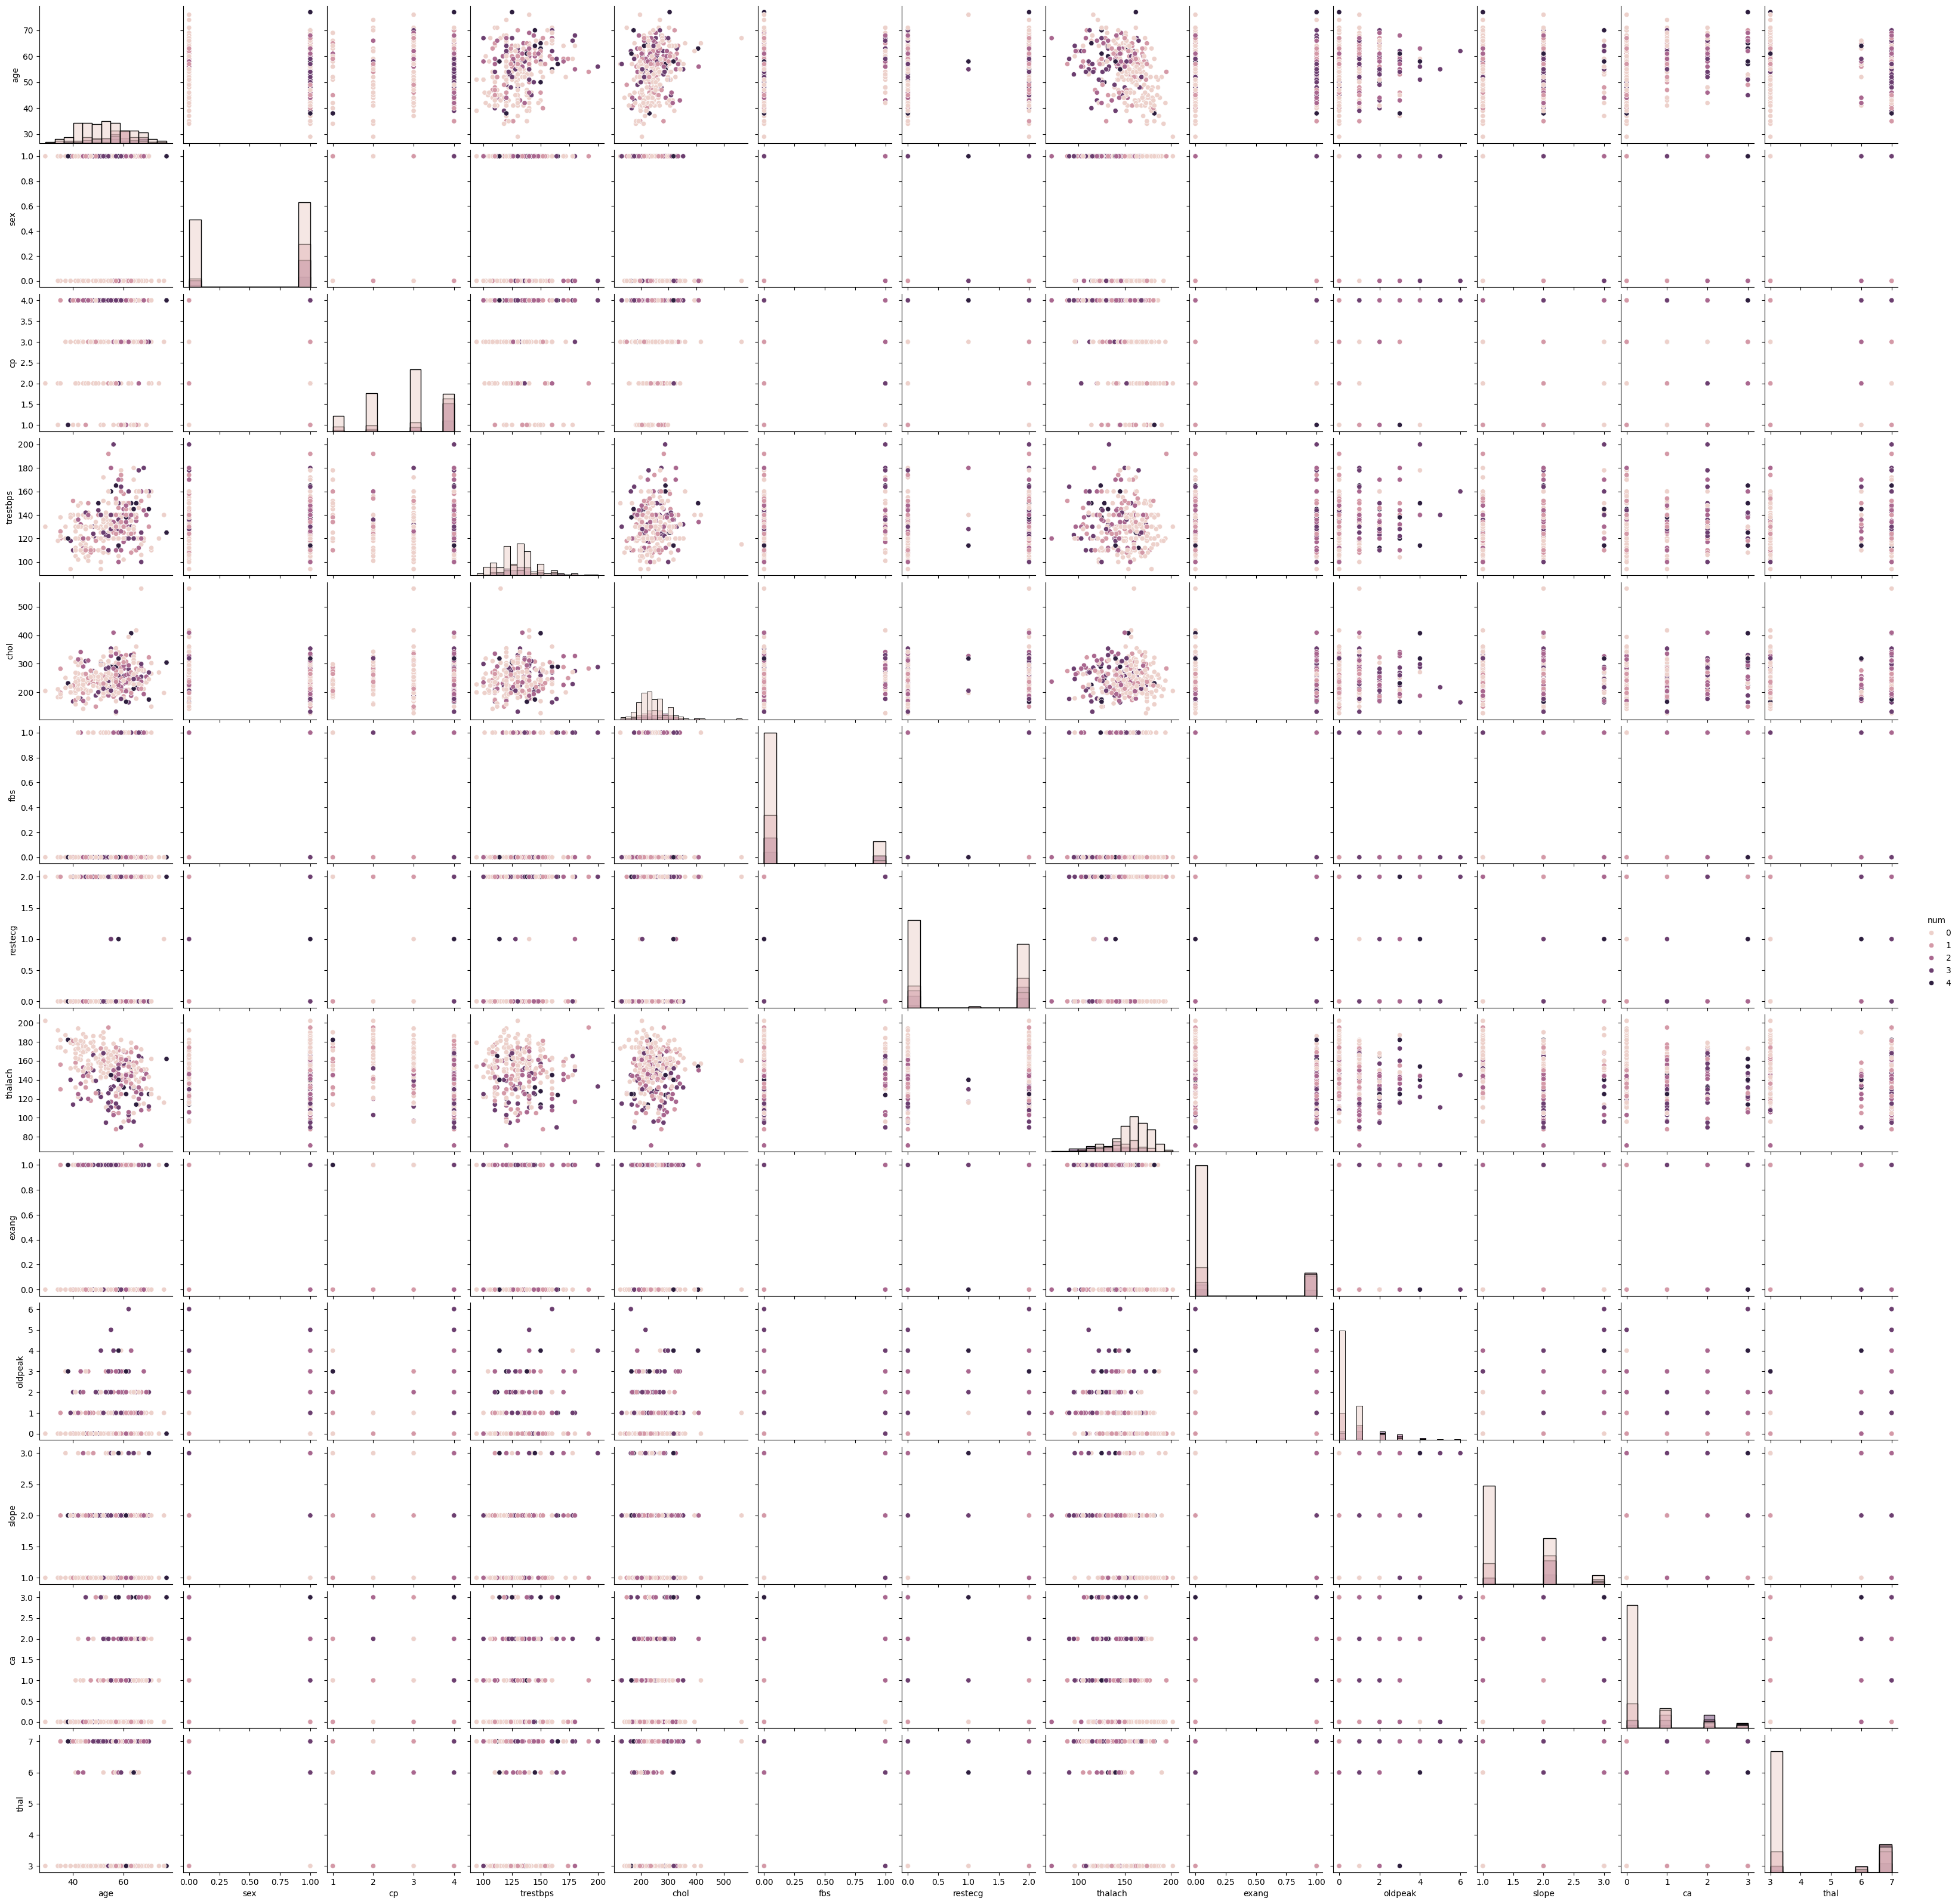

In [169]:
# Drop NaN values if any
df.dropna(inplace=True)
print(df.shape)

# Extract features and output labels
features = df.drop(columns=['num'])  # Assuming 'num' is the output label column
output_labels = df['num']

# Combine features and output labels for pairplot
pairplot_data = pd.concat([features, output_labels], axis=1)

# Create pairplot
sns.pairplot(pairplot_data, hue='num', diag_kind='hist')
plt.show()

- Age has strong relationship with oldpeak, thalach, chol, and trestb
- Trestbps has strong relationship with oldpeak, thalach, age, and chol
- Chol has strong relationship with oldpeak, thalach, trestbps, and age
- thalach has strong relationship with oldpeak, chol, trestbps, and age
- Oldpeak has strong relationship with chol, trestbps, age, and thalach

 <span style="font-size:19pt;">2)</span>

Naive Bayes accuracy: 0.5556


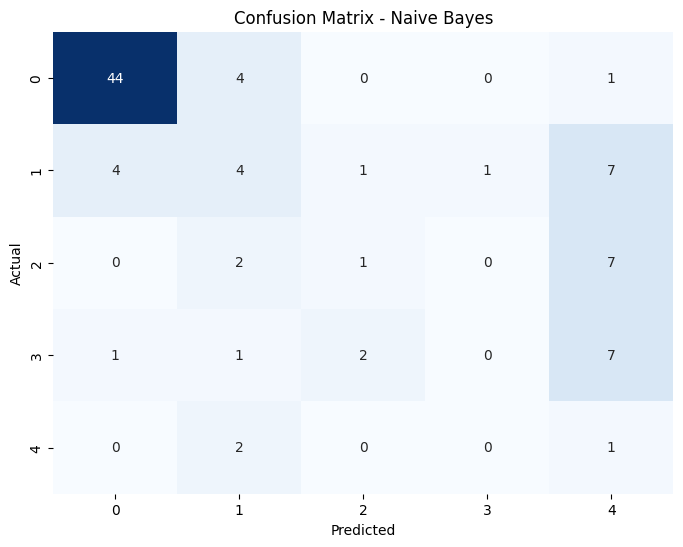

Logistic Regression accuracy: 0.6444


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


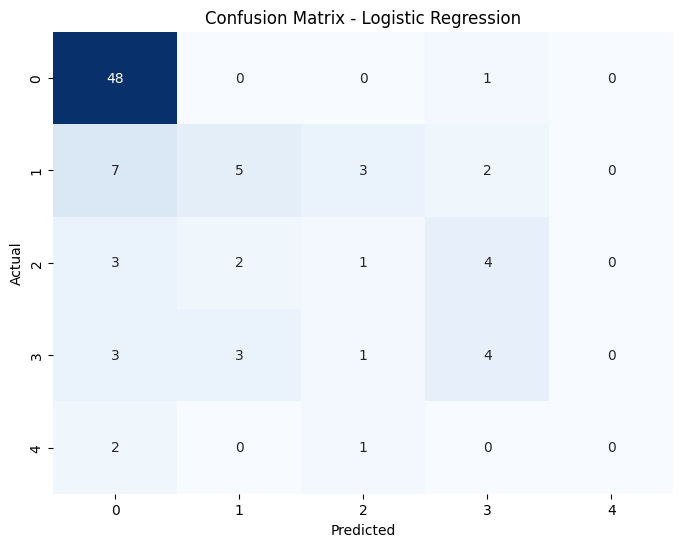

LDA accuracy: 0.5889


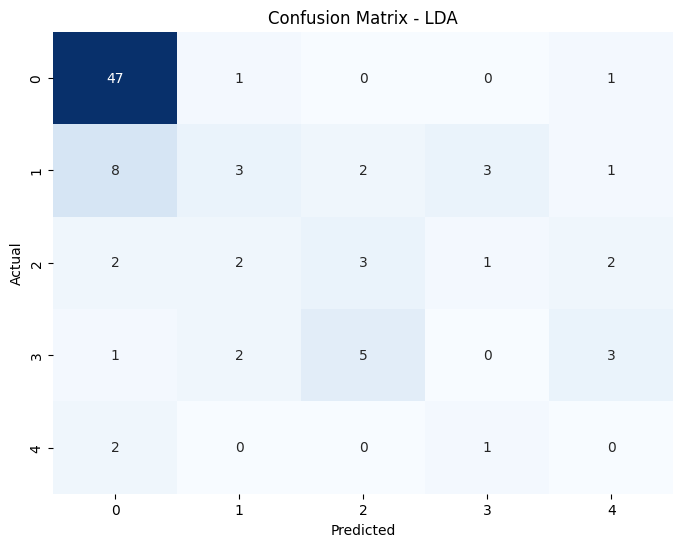

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA accuracy: 0.5889


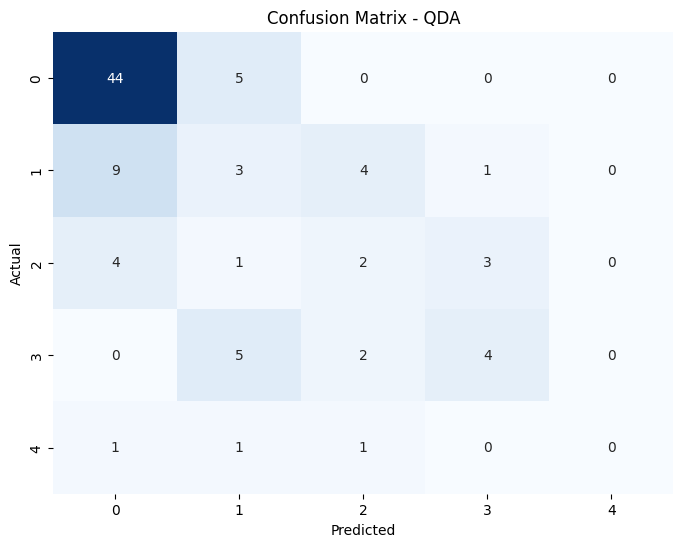

K-Nearest Neighbors accuracy: 0.5000


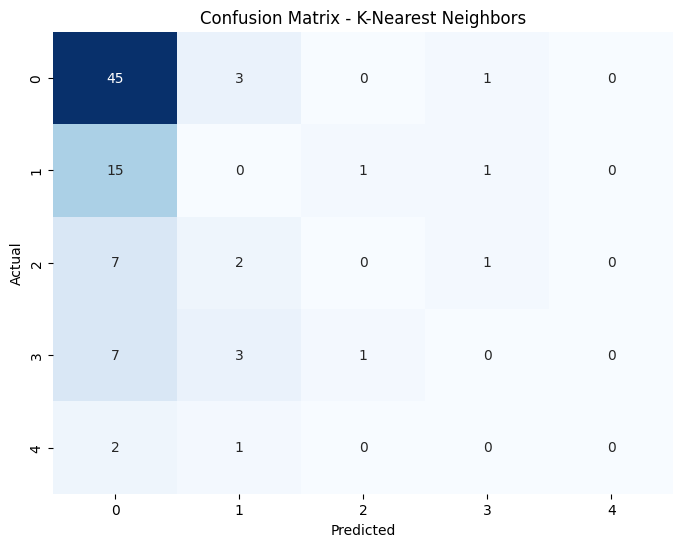

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features and output labels
X = df.drop(columns=['num'])  # Features
y = df['num']  # Output labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} accuracy: {accuracy:.4f}")
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()

- Naive Bayes accuracy: 0.5467
- Logistic Regression accuracy: 0.6667
- LDA accuracy: 0.5867
- QDA accuracy: 0.6000
- K-Nearest Neighbors accuracy: 0.4933

 <span style="font-size:19pt;">3)</span>

Decision Tree Classifier accuracy: 0.4889


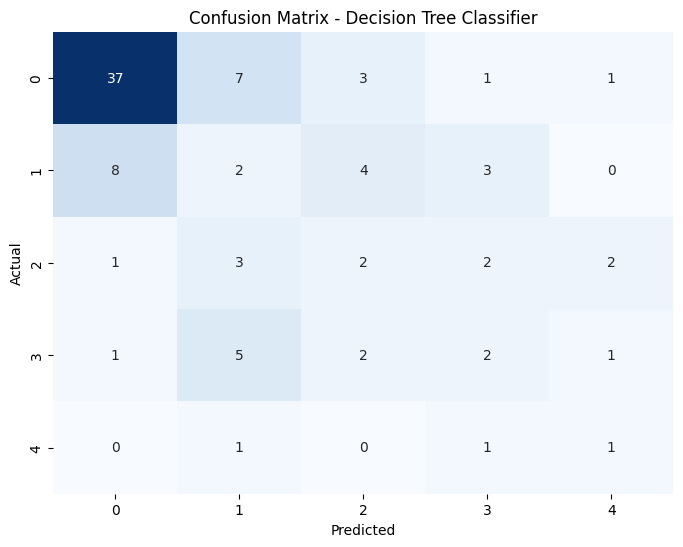

In [171]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

 <span style="font-size:19pt;">4)</span>

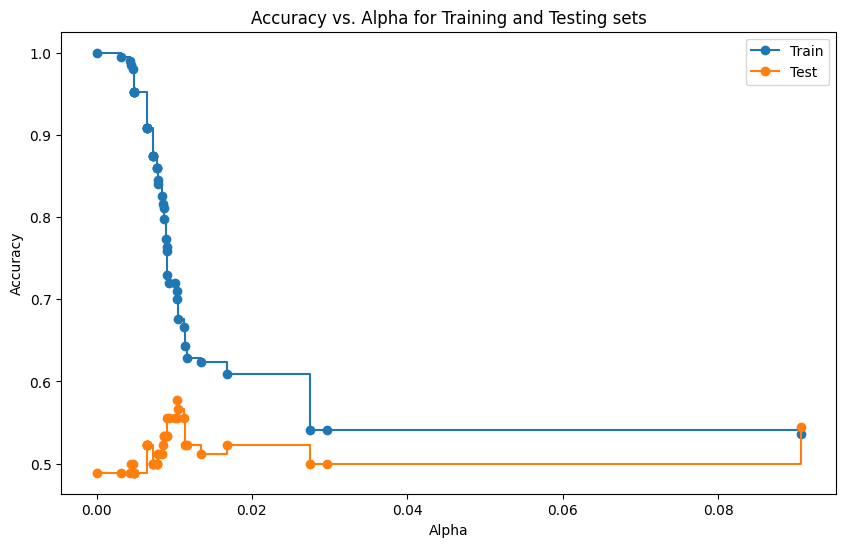

Decision Tree Classifier accuracy after pruning: 0.5778


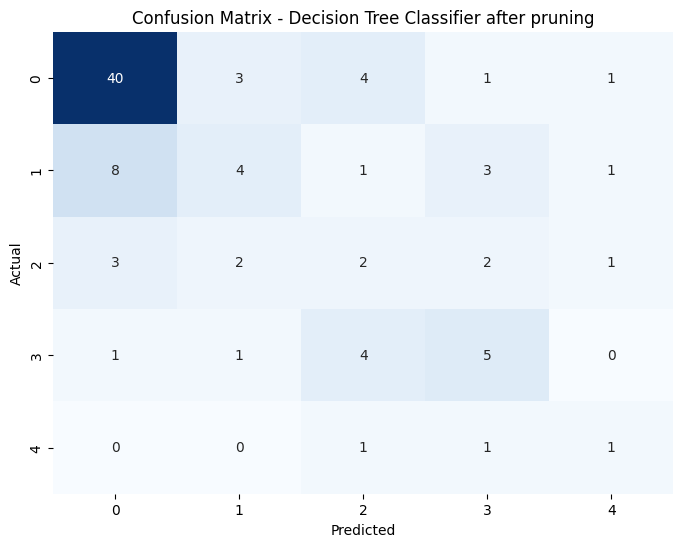

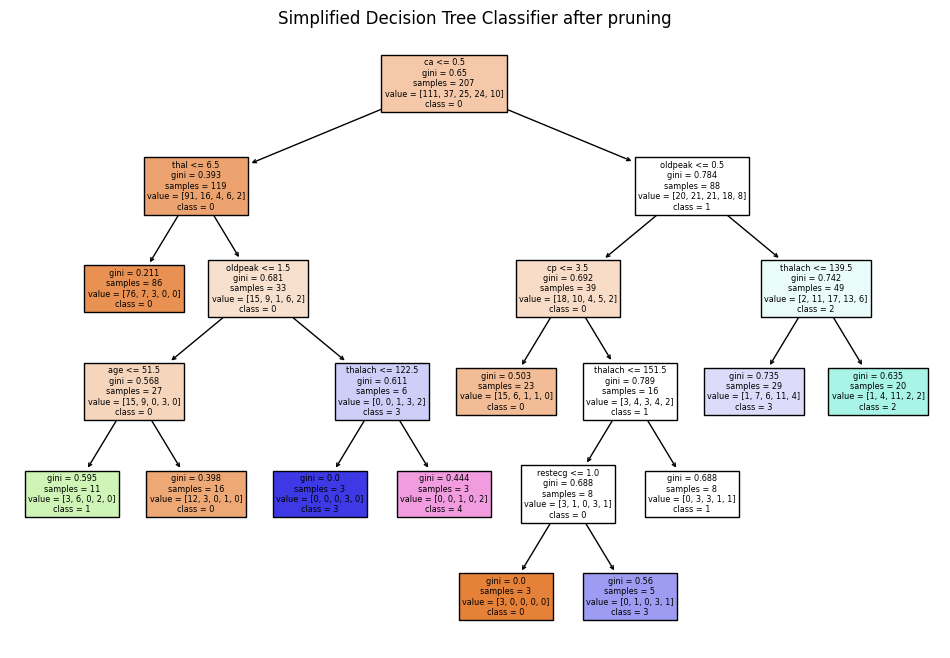

In [172]:
# Initialize and train the Decision Tree Classifier with cost-complexity pruning
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)  # Initialize with no pruning
clf.fit(X_train, y_train)

# Cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

# Iterate over alphas to find the best one
clfs = []
for alpha in alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate accuracies for each alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot the accuracies vs. alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Training and Testing sets')
plt.legend()
plt.show()

# Choose the best alpha with the highest test accuracy
best_alpha = alphas[test_scores.index(max(test_scores))]

# Re-train the model with the best alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy after pruning: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier after pruning')
plt.show()

# Plot the simplified tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'])
plt.title('Simplified Decision Tree Classifier after pruning')
plt.show()

What is intuitive is that we are using the gini index to evaluate when a node should be turned into a leaf which means that we have found a value adequate for the classification. What is not intuative is some of the values that represent classes sometimes go out of the range [0,4], which should not happen.

 <span style="font-size:19pt;">5)</span>

In [173]:
# Function to check if a column contains non-numeric values
def has_non_numeric(column):
    return not column.apply(lambda x: isinstance(x, (int, float))).all()

# Get column names with non-numeric values
non_numeric_columns = [col for col in df.columns if has_non_numeric(df[col])]

print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: []


XGBoost Classifier Accuracy: 0.5333333333333333


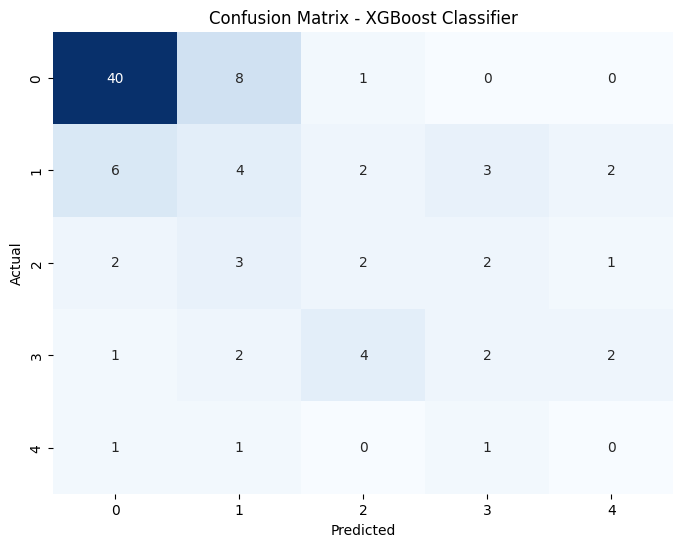

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# create XGBoost classifier
xgb = XGBClassifier()

# preset hyper parameters fine tuning to find best combination
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# ordinal = ["slope", "thal", "exang", "restecg", "fbs", "cp", "sex"]

# start Hyper parameters fine tuning
xgb_grid = GridSearchCV(xgb, param_grid=params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# record best combination of hyper parameters
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
# evaluate performance of classification
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

# Print confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


Random Forest Classifier Accuracy: 0.5888888888888889


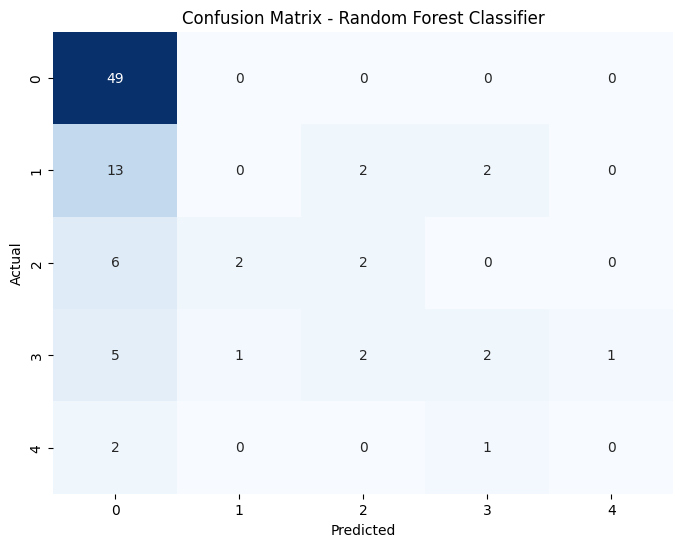

In [175]:
# create Random forest classifier
rf = RandomForestClassifier()

# preset hyper parameters
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# start fine tuning to find best combination
rf_grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# record best combination of hyper parameters
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
# evaluate performance of classification
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Print confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

The accuracy of the Random Forest is higher than the XGBoost model, therefore it is more accurate and a better choice but only because Random Forest are good are finding patterns in high dimensional data and also because the dataset is very small. If there was more data XGBoost would outperform Random Forest.

 <span style="font-size:19pt;">6)</span>

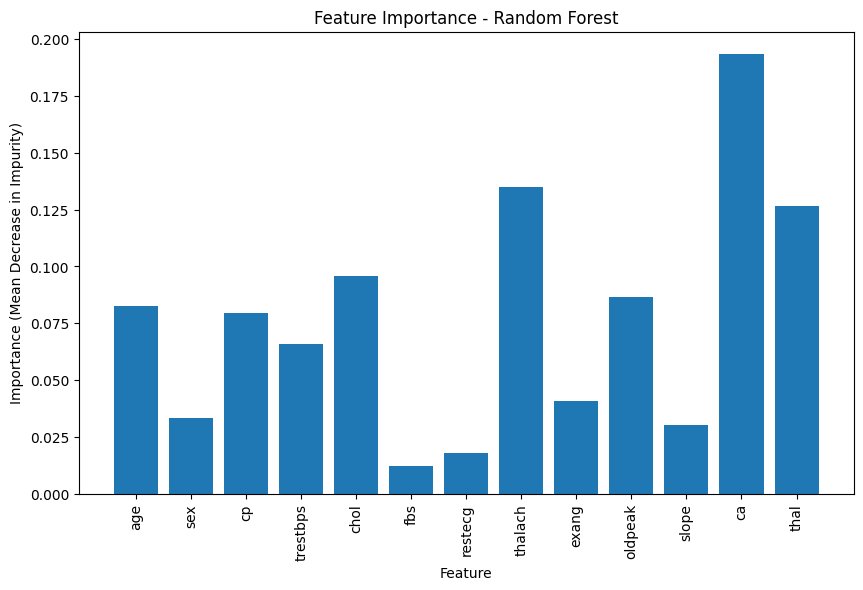

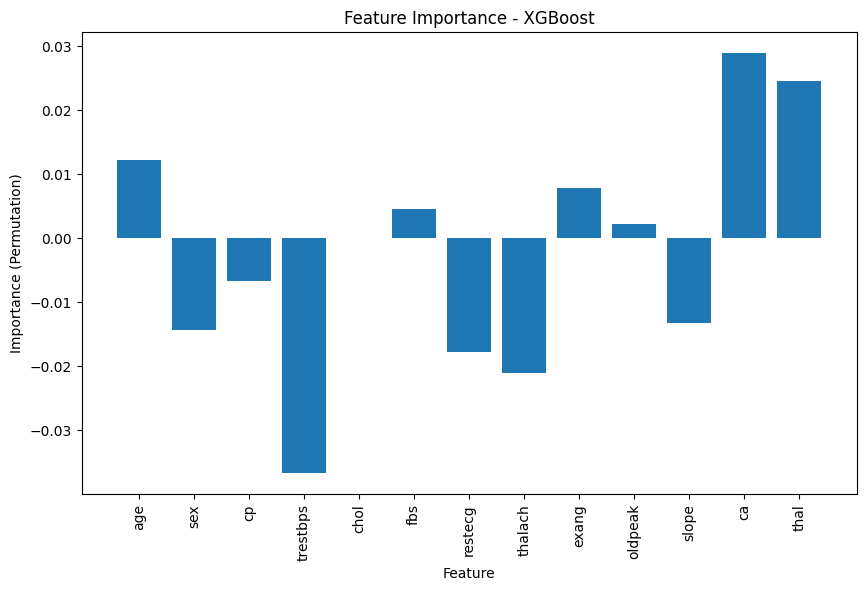

In [176]:
from sklearn.inspection import permutation_importance


# Compute feature importances for Random Forest
rf_importances = rf_best.feature_importances_

# Compute permutation importances for XGBoost
result = permutation_importance(xgb_best, X_test, y_test, n_repeats=10, random_state=42)
xgb_importances = result.importances_mean

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_importances)
plt.xlabel('Feature')
plt.ylabel('Importance (Mean Decrease in Impurity)')
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation=90)
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb_importances)
plt.xlabel('Feature')
plt.ylabel('Importance (Permutation)')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation=90)
plt.show()


- ca: number of major vessels
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- thalach: maximum heart rate achieved
- age: age in years

These features above are the most important aspects of determining if someone has a heart disease or not. They are very important and are present during the splits in the tree of question 4. Since the same features come back across 3 approaches we can deduce that they are meaningful for medical diagnosis.

 <span style="font-size:19pt;">7)</span>

In [177]:
# Column headers as a string separated by commas
headers_str = "poisonous,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat"

# Split the string to get the column names
column_names = headers_str.split(',')

# Replace 'your_file_path.data' with the actual path to your .data file
file_path = 'agaricus-lepiota.data'

# Read the .data file into a DataFrame
df = pd.read_table(file_path,sep=",", header=None, names= column_names)

print(df.shape)

print(df)

# Drop NaN values if any
df.dropna(inplace=True)
print(df.shape)

(8124, 23)
     poisonous cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0            p         x           s         n        t    p               f   
1            e         x           s         y        t    a               f   
2            e         b           s         w        t    l               f   
3            p         x           y         w        t    p               f   
4            e         x           s         g        f    n               f   
5            e         x           y         y        t    a               f   
6            e         b           s         w        t    a               f   
7            e         b           y         w        t    l               f   
8            p         x           y         w        t    p               f   
9            e         b           s         y        t    a               f   
10           e         x           y         y        t    l               f   
11           e         x     

In [178]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('poisonous', axis=1)
y = df['poisonous']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform one-hot encoding on the training and testing features
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

 <span style="font-size:19pt;">8)</span>

Decision Tree Classifier accuracy: 1.0000


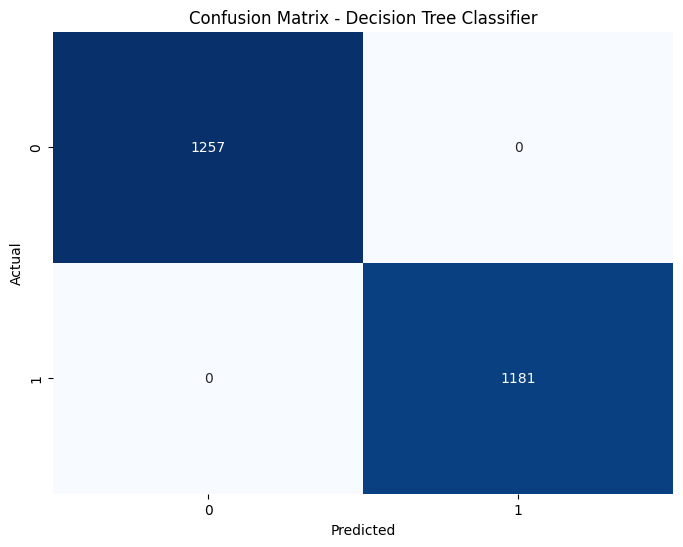

In [179]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = clf.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

 <span style="font-size:19pt;">9)</span>

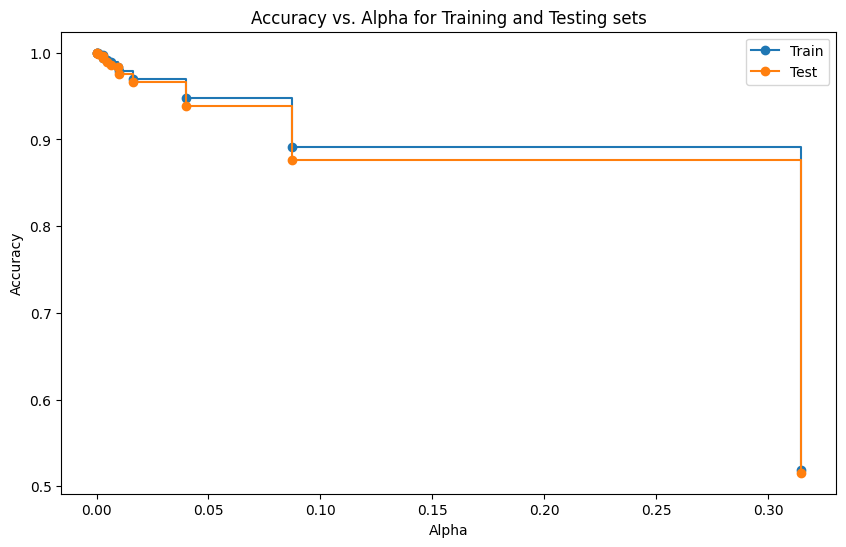

Decision Tree Classifier accuracy after pruning: 1.0000


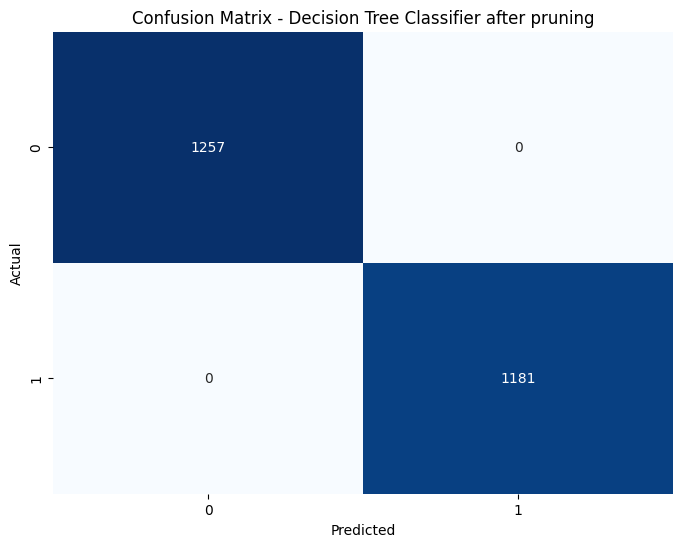

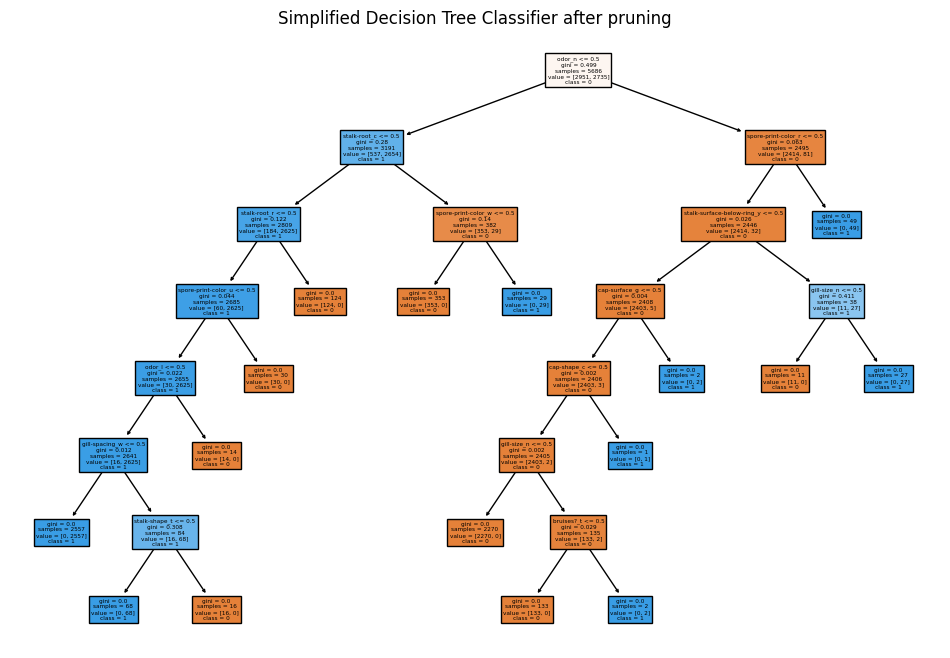

In [180]:
# # Initialize and train the Decision Tree Classifier with cost-complexity pruning
# clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)  # Initialize with no pruning
# clf.fit(X_train_encoded, y_train)

# Cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train_encoded, y_train)
alphas = path['ccp_alphas']

# Iterate over alphas to find the best one
clfs = []
for alpha in alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_encoded, y_train)
    clfs.append(clf)

# Calculate accuracies for each alpha
train_scores = [clf.score(X_train_encoded, y_train) for clf in clfs]
test_scores = [clf.score(X_test_encoded, y_test) for clf in clfs]

# Plot the accuracies vs. alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha for Training and Testing sets')
plt.legend()
plt.show()

# Choose the best alpha with the highest test accuracy
best_alpha = alphas[test_scores.index(max(test_scores))]

# Re-train the model with the best alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = clf.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy after pruning: {accuracy:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier after pruning')
plt.show()

# Plot the simplified tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_train_encoded.columns, class_names=["0", "1"])
plt.title('Simplified Decision Tree Classifier after pruning')
plt.show()

What is intuitive is that we are using the gini index to evaluate when a node should be turned into a leaf which means that we have found a value adequate for the classification. What is not intuative is some of the values that represent classes sometimes go out of the range [0,1], which should not happen. 
Odor and color seems also to be very important feature in determining if mushroom is edible.
The accuracy is still 100% after cost complexity pruning.

 <span style="font-size:19pt;">10)</span>

XGBoost Classifier Accuracy: 1.0


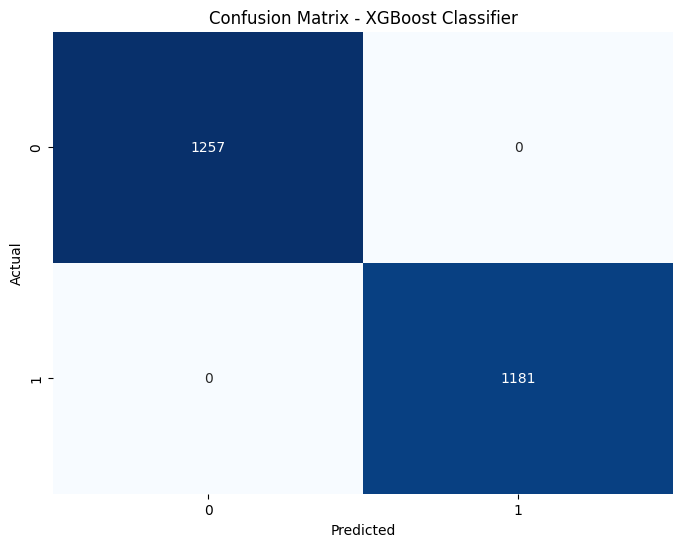

In [181]:
# Perform one-hot encoding on the training and testing features
y_train_encoded = pd.get_dummies(y_train, drop_first=True)
y_test_encoded = pd.get_dummies(y_test, drop_first=True)

# create XGBoost classifier
xgb = XGBClassifier()

# preset hyper parameters fine tuning to find best combination
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# start Hyper parameters fine tuning
xgb_grid = GridSearchCV(xgb, param_grid=params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_encoded, y_train_encoded)

# record best combination of hyper parameters
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test_encoded)
# evaluate performance of classification
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

# Print confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


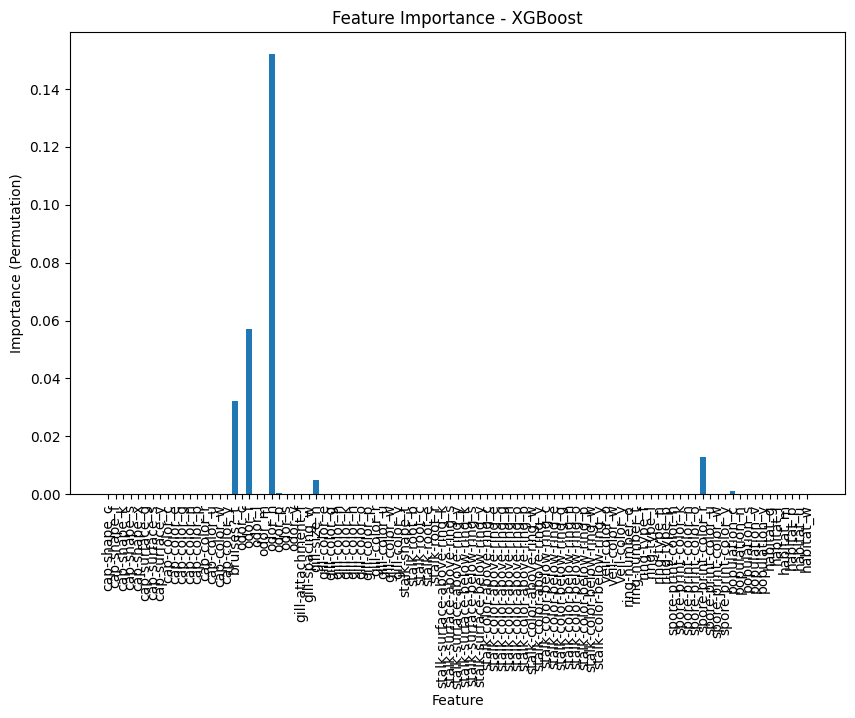

In [182]:
# Compute permutation importances for XGBoost
result = permutation_importance(xgb_best, X_test_encoded, y_test_encoded, n_repeats=10, random_state=42)
xgb_importances = result.importances_mean

# Plot feature importances for XGBoost
plt.figure(figsize=(10, 6))
plt.bar(X_train_encoded.columns, xgb_importances)
plt.xlabel('Feature')
plt.ylabel('Importance (Permutation)')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation=90)
plt.show()